Import libraries

In [2]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import joblib

Load the data

In [3]:
df = pd.read_csv("Exam_Score_Prediction.csv")

In [4]:
df.head()

,student_id,age,gender,course,study_hours,class_attendance,internet_access,sleep_hours,sleep_quality,study_method,facility_rating,exam_difficulty,exam_score
0,1,17,male,diploma,2.78,92.9,yes,7.4,poor,coaching,low,hard,58.9
1,2,23,other,bca,3.37,64.8,yes,4.6,average,online videos,medium,moderate,54.8
2,3,22,male,b.sc,7.88,76.8,yes,8.5,poor,coaching,high,moderate,90.3
3,4,20,other,diploma,0.67,48.4,yes,5.8,average,online videos,low,moderate,29.7
4,5,20,female,diploma,0.89,71.6,yes,9.8,poor,coaching,low,moderate,43.7


Check data info + basic checks (info, shape, null, head, duplicates, types)

In [ ]:
print("Shape:", df.shape)

Shape: (20000, 13)


In [ ]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   student_id        20000 non-null  int64  
 1   age               20000 non-null  int64  
 2   gender            20000 non-null  object 
 3   course            20000 non-null  object 
 4   study_hours       20000 non-null  float64
 5   class_attendance  20000 non-null  float64
 6   internet_access   20000 non-null  object 
 7   sleep_hours       20000 non-null  float64
 8   sleep_quality     20000 non-null  object 
 9   study_method      20000 non-null  object 
 10  facility_rating   20000 non-null  object 
 11  exam_difficulty   20000 non-null  object 
 12  exam_score        20000 non-null  float64
dtypes: float64(4), int64(2), object(7)
memory usage: 2.0+ MB
None


In [ ]:
print("There is {} missing values in data frame".format(df.isnull().sum().sum()))

There is 0 missing values in data frame


In [32]:
print(df.isna().sum())

student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


In [ ]:
print("\nDuplicate rows:", df.duplicated().sum())


Duplicate rows: 0


Descriptive **analysis**

In [ ]:
# Numeric summary
num_cols = df.select_dtypes(include=["int64", "float64"]).columns
print("Numeric columns:", list(num_cols))

print("\nDescribe (numeric):")
print(df[num_cols].describe())

Numeric columns: ['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours', 'exam_score']

Describe (numeric):
         student_id           age   study_hours  class_attendance  \
count  20000.000000  20000.000000  20000.000000      20000.000000   
mean   10000.504600     20.473300      4.007604         70.017365   
std     5773.654959      2.284458      2.308313         17.282262   
min        1.000000     17.000000      0.080000         40.600000   
25%     5000.750000     18.000000      2.000000         55.100000   
50%    10000.500000     20.000000      4.040000         69.900000   
75%    15000.250000     22.000000      6.000000         85.000000   
max    20001.000000     24.000000      7.910000         99.400000   

       sleep_hours    exam_score  
count  20000.00000  20000.000000  
mean       7.00856     62.513225  
std        1.73209     18.908491  
min        4.10000     19.599000  
25%        5.50000     48.800000  
50%        7.00000     62.600000  
75%      

In [5]:
# Mode for all columns
print("\nMode (first mode if multiple):")
print(df.mode(numeric_only=False).iloc[0])


Mode (first mode if multiple):
student_id                   1
age                       21.0
gender                   other
course                     bca
study_hours               7.91
class_attendance          40.6
internet_access            yes
sleep_hours                4.1
sleep_quality          average
study_method        self-study
facility_rating         medium
exam_difficulty       moderate
exam_score               100.0
Name: 0, dtype: object


In [ ]:
# Skewness & kurtosis (numeric)

print("\nSkewness:")
print(df[num_cols].skew(numeric_only=True))

print("\nKurtosis:")
print(df[num_cols].kurtosis(numeric_only=True))


Skewness:
student_id          0.000005
age                 0.014752
study_hours        -0.010299
class_attendance   -0.001290
sleep_hours        -0.000771
exam_score         -0.049059
dtype: float64

Kurtosis:
student_id         -1.199994
age                -1.230292
study_hours        -1.202389
class_attendance   -1.198728
sleep_hours        -1.208531
exam_score         -0.618423
dtype: float64


In [ ]:
# Correlation (numeric only)
corr = df[num_cols].corr()
print("\nCorrelation (numeric):")
print(corr)


Correlation (numeric):
                  student_id       age  study_hours  class_attendance  \
student_id          1.000000 -0.002574     0.002116          0.001128   
age                -0.002574  1.000000     0.002955          0.008449   
study_hours         0.002116  0.002955     1.000000         -0.001645   
class_attendance    0.001128  0.008449    -0.001645          1.000000   
sleep_hours        -0.000560 -0.000385    -0.004533          0.007187   
exam_score          0.003269  0.006522     0.717788          0.308850   

                  sleep_hours  exam_score  
student_id          -0.000560    0.003269  
age                 -0.000385    0.006522  
study_hours         -0.004533    0.717788  
class_attendance     0.007187    0.308850  
sleep_hours          1.000000    0.133222  
exam_score           0.133222    1.000000  


**Visualizations**

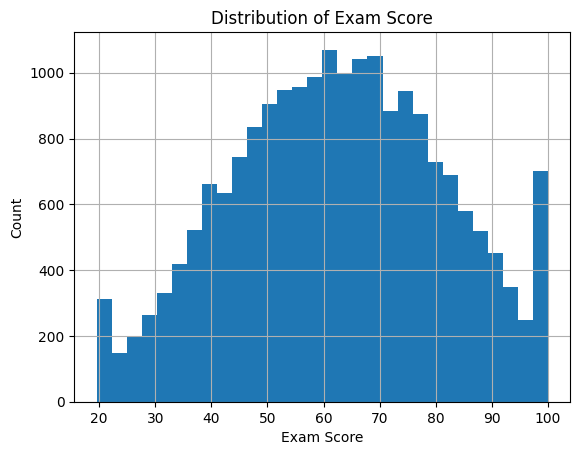

In [11]:
import matplotlib.pyplot as plt

plt.figure()
df["exam_score"].hist(bins=30)
plt.title("Distribution of Exam Score")
plt.xlabel("Exam Score")
plt.ylabel("Count")
plt.show()

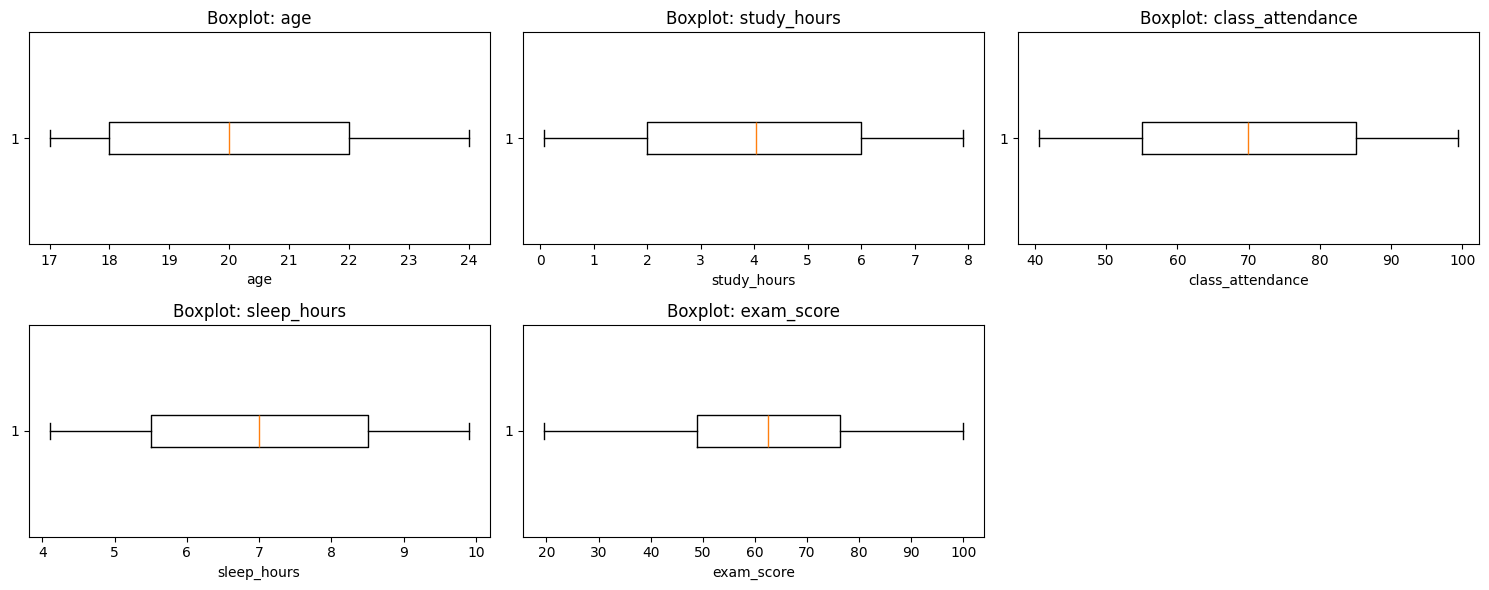

In [ ]:
import math

# Exclude 'student_id' from numeric columns for boxplot analysis as it's an identifier
num_cols_for_boxplot = df.select_dtypes(include=["int64", "float64"]).columns.drop('student_id', errors='ignore')

num_plots = len(num_cols_for_boxplot)
cols_per_row = 3  # You can adjust this number based on preference
rows = math.ceil(num_plots / cols_per_row)

# Create a figure and a set of subplots
fig, axes = plt.subplots(rows, cols_per_row, figsize=(cols_per_row * 5, rows * 3))
axes = axes.flatten() # Flatten the 2D array of axes for easy iteration

for i, col in enumerate(num_cols_for_boxplot):
    ax = axes[i]
    ax.boxplot(df[col].dropna(), vert=False) # Plot horizontal boxplot
    ax.set_title(f"Boxplot: {col}")
    ax.set_xlabel(col)

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout() # Adjust layout to prevent labels from overlapping
plt.show()

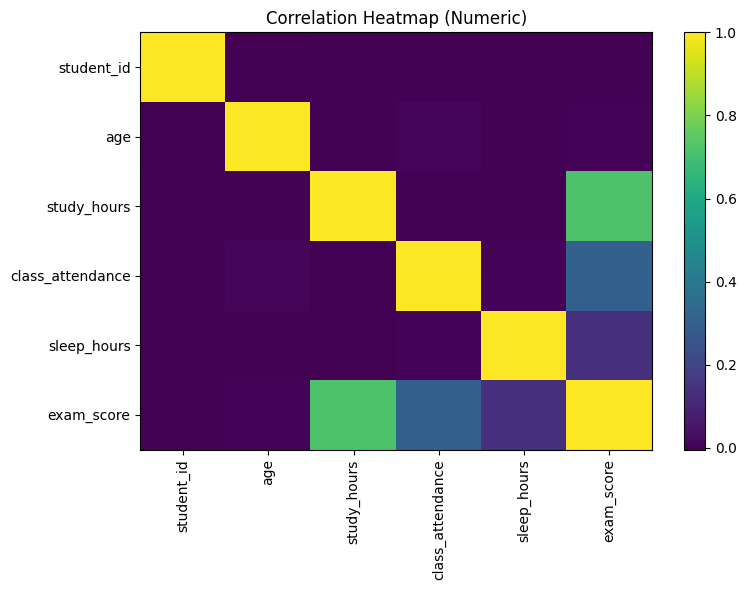

In [ ]:
# Heatmap (simple)
plt.figure(figsize=(8,6))
plt.imshow(corr, aspect="auto")
plt.xticks(range(len(corr.columns)), corr.columns, rotation=90)
plt.yticks(range(len(corr.index)), corr.index)
plt.colorbar()
plt.title("Correlation Heatmap (Numeric)")
plt.tight_layout()
plt.show()

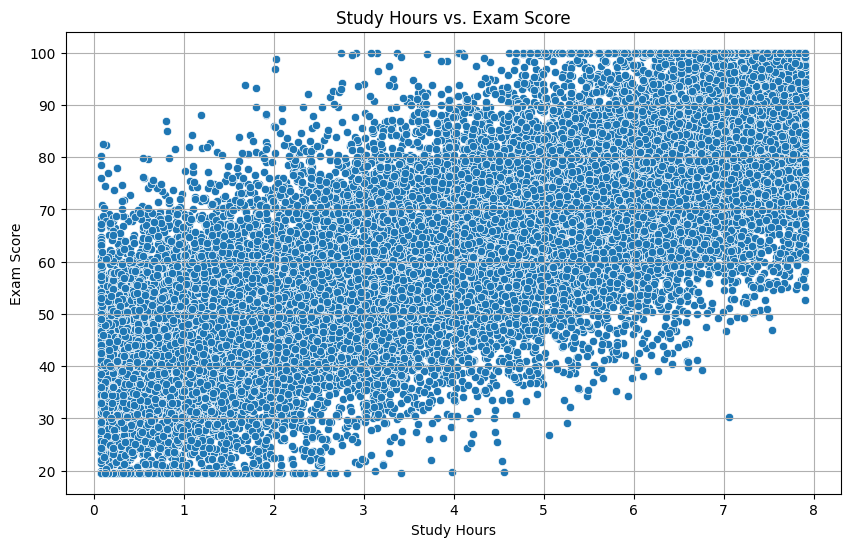

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.scatterplot(x='study_hours', y='exam_score', data=df)
plt.title('Study Hours vs. Exam Score')
plt.xlabel('Study Hours')
plt.ylabel('Exam Score')
plt.grid(True)
plt.show()

Data **preprocessing**

Remove duplicates

In [12]:
df = df.drop_duplicates()
print("Shape after dropping duplicates:", df.shape)


Shape after dropping duplicates: (20000, 13)


In [33]:
df_clean = df.copy()

In [ ]:
df.shape

(20000, 13)

In [34]:
# numeric -> median
for col in df_clean.select_dtypes(include=["int64","float64"]).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].median())

In [15]:
# categorical -> mode
for col in df_clean.select_dtypes(include=["object"]).columns:
    df_clean[col] = df_clean[col].fillna(df_clean[col].mode()[0])

print("Missing values after cleaning:")
print(df_clean.isna().sum())

Missing values after cleaning:
student_id          0
age                 0
gender              0
course              0
study_hours         0
class_attendance    0
internet_access     0
sleep_hours         0
sleep_quality       0
study_method        0
facility_rating     0
exam_difficulty     0
exam_score          0
dtype: int64


Outlier removal

In [ ]:
df_out = df_clean.copy()

numeric_features = df_out.select_dtypes(include=["int64","float64"]).columns

#  we exclude target
numeric_features = [c for c in numeric_features if c != "exam_score"]

for col in numeric_features:
    Q1 = df_out[col].quantile(0.25)
    Q3 = df_out[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df_out = df_out[(df_out[col] >= low) & (df_out[col] <= high)]

print("Shape after outlier removal:", df_out.shape)


Shape after outlier removal: (20000, 13)


Split the data

In [29]:
X = df_model.drop(columns=[target])
y = df_model[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)

Train shape: (16000, 23)
Test shape: (4000, 23)


### Preprocessing Pipeline

In [30]:
# Combine numeric and categorical transformers
preprocess = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_cols),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols)
    ],
    remainder='passthrough' # Keep other columns if any, though none expected after initial drop
)

Scaling

In [20]:
# Use the outlier-cleaned df if you ran it; otherwise use df_clean
data = df_clean.copy()  # Using df_clean as df_out is not defined

target = "exam_score"
X = data.drop(columns=[target])
y = data[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

numeric_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Transformer for numeric features (scaling)
scaler_transformer = ColumnTransformer(
    transformers=[
        ("num", StandardScaler(), numeric_cols)
    ],
    remainder='drop' # Drop other columns not handled by this transformer
)

print(scaler_transformer)

ColumnTransformer(transformers=[('num', StandardScaler(),
                                 Index(['student_id', 'age', 'study_hours', 'class_attendance', 'sleep_hours'], dtype='object'))])


one-hot encoding

In [26]:
# Drop student_id for modeling
if "student_id" in df.columns:
    df_model = df.drop(columns=["student_id"])
else:
    df_model = df.copy()

# One-hot encode categorical columns
df_model = pd.get_dummies(df_model, drop_first=True)
print("Shape after one-hot encoding:", df_model.shape)

Shape after one-hot encoding: (20000, 24)


Feature selection

In [31]:
# Only numeric correlation (after cleaning)
tmp = data[[*numeric_cols, target]].corr()[target].sort_values(ascending=False)
print(tmp)


exam_score          1.000000
study_hours         0.717788
class_attendance    0.308850
sleep_hours         0.133222
age                 0.006522
student_id          0.003269
Name: exam_score, dtype: float64


*In summary, study hours and class attendance appear to be the most influential numeric features for predicting exam score based on their correlation values.*

Build, train, test the  models.

In [ ]:
models = {
    "LinearRegression": LinearRegression(),
    "DecisionTree": DecisionTreeRegressor(random_state=42),
    "RandomForest": RandomForestRegressor(random_state=42, n_estimators=200)
}

def mape(y_true, y_pred):
    y_true = np.array(y_true)
    y_pred = np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / np.maximum(np.abs(y_true), 1e-8))) * 100

results = []

for name, model in models.items():
    pipe = Pipeline(steps=[("prep", preprocess), ("model", model)])
    pipe.fit(X_train, y_train)
    preds = pipe.predict(X_test)

    mae = mean_absolute_error(y_test, preds)
    mse = mean_squared_error(y_test, preds)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, preds)
    mape_val = mape(y_test, preds)

    results.append([name, mae, mse, rmse, r2, mape_val])

results_df = pd.DataFrame(
    results, columns=["Model", "MAE", "MSE", "RMSE", "R2", "MAPE(%)"]
).sort_values("RMSE")

results_df


,Model,MAE,MSE,RMSE,R2,MAPE(%)
0,LinearRegression,7.863361,95.503594,9.772594,0.733004,14.655924
2,RandomForest,8.311086,105.802385,10.286029,0.704212,15.584027
1,DecisionTree,11.910543,222.347997,14.911338,0.378390,21.847119


*Interpretation: LinearRegression is objectively the best here because it has the lowest RMSE and highest R² on the test data.*

Choose best model + save it

In [ ]:
best_model_name = results_df.iloc[0]["Model"]
print("Best model:", best_model_name)

best_estimator = models[best_model_name]
best_pipe = Pipeline(steps=[("prep", preprocess), ("model", best_estimator)])
best_pipe.fit(X_train, y_train)

joblib.dump(best_pipe, "best_exam_score_model.pkl")
print("Saved: best_exam_score_model.pkl")


Best model: LinearRegression
Saved: best_exam_score_model.pkl


Deploy with unknown data

In [ ]:
loaded_model = joblib.load("best_exam_score_model.pkl")

# Example: take 5 rows from test set as "new" data
new_data = X_test.head(5)
pred_new = loaded_model.predict(new_data)

print("Predictions:", pred_new)


Predictions: [ 36.79567905  79.97533415  54.43529467 102.16790048  80.62278117]


**Report**

**Data Loading and Initial Exploration**

The dataset for this project was loaded from a CSV file into Google Colab for analysis. The dataset contains 20,000 observations and 13 variables, including both numerical and categorical attributes related to students’ academic and behavioral factors. Initial data exploration confirmed that the dataset contained no missing values and no duplicate records, ensuring good data quality.

Descriptive statistical analysis was conducted to understand the distribution of numerical variables. Measures such as mean, median, standard deviation, minimum, maximum, and quartiles were examined. These statistics provided insights into students’ performance patterns and variability across features, helping to establish a strong foundation before preprocessing and model development.

**Data Preprocessing**

During the preprocessing stage, exam_score was defined as the target variable, while all remaining columns were treated as input features. Numerical features were standardized using StandardScaler to ensure that all variables contributed equally to the model and to prevent features with larger scales from dominating the learning process.

Categorical variables were transformed using One-Hot Encoding, converting non-numeric categories into numerical format suitable for regression models. The dataset was then split into 80% training data and 20% testing data using a fixed random state to ensure reproducibility and consistency across experiments. This step allowed the model to be trained on one portion of the data and evaluated on unseen data.


**Model Training and Evaluation**

Multiple regression models were implemented and evaluated, including Linear Regression, Decision Tree Regressor, and Random Forest Regressor. Model performance was assessed using standard regression evaluation metrics such as Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Percentage Error (MAPE), and R² score.

Among the tested models, Linear Regression achieved the best overall performance, with the lowest RMSE (9.77) and the highest R² score (0.733) on the test dataset. This indicates that the Linear Regression model was able to explain approximately 73.3% of the variance in exam scores while maintaining the smallest prediction error. Decision Tree and Random Forest models showed comparatively higher error values, suggesting overfitting or reduced generalization capability for this dataset.

**Model Comparison and Interpretation**

The superior performance of Linear Regression suggests that the relationship between the predictor variables and exam scores is largely linear in nature. While Decision Tree and Random Forest models are capable of capturing complex non-linear relationships, they did not outperform Linear Regression in this case. This outcome highlights that simpler models can often provide better generalization when the underlying data patterns are linear and well-structured.

Additionally, Linear Regression offers strong interpretability, making it easier to explain the impact of individual features on exam scores—an important consideration in academic and educational analytics.

**Conclusion**

This project demonstrates the effective application of regression-based machine learning techniques for predicting student exam performance. After thorough data preprocessing, model training, and evaluation, Linear Regression was selected as the final model due to its superior predictive accuracy, lower error metrics, and high interpretability.

The results emphasize that students’ exam scores can be reliably predicted using structured academic and behavioral data. The findings also show that selecting an appropriate and simple model can lead to strong predictive performance without unnecessary complexity. This model can serve as a valuable tool for academic performance analysis and educational decision-making.